In [1]:


from langgraph.graph import StateGraph, START, END
from langchain_perplexity import ChatPerplexity
from typing import TypedDict
from dotenv import load_dotenv



In [2]:
load_dotenv()

model = ChatPerplexity()

In [8]:


class BlogState(TypedDict):

    title: str
    outline: str
    content: str



In [ ]:


def create_outline(state: BlogState) -> BlogState:

    
    title = state['title']

    
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    
    state['outline'] = outline

    return state



In [11]:


def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state



In [ ]:


graph = StateGraph(BlogState)


graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)


graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

workflow = graph.compile()



In [13]:
intial_state = {'title': 'Why tailwind layoff their 75% team? '}

final_state = workflow.invoke(intial_state)

print(final_state)

{'title': 'Why tailwind layoff their 75% team? ', 'outline': '# Blog Outline: Why Tailwind Labs Laid Off 75% of Their Engineering Team\n\n## I. Introduction\n- **Hook**: Start with the shocking statistic—Tailwind Labs, creators of the massively popular Tailwind CSS framework, laid off 75% of their engineering team (3 out of 4 engineers) in January 2026, despite record usage growth.[1][2][3][4]\n- Thesis: The layoffs stem from AI\'s "brutal impact" on revenue, not declining popularity of Tailwind CSS itself—traffic to their documentation dropped 40%, crippling their sales funnel for paid products.[1][2][3]\n- Teaser: Explore CEO Adam Wathan\'s explanations, the AI-driven shift in developer behavior, counterarguments, and future implications.\n- Brief company overview: Small team (now three co-founders, one engineer, one part-time staff) sustaining an open-source project via commercial offerings like Tailwind UI.[2][4][5]\n\n## II. The Layoff Announcement and Immediate Context\n- Timelin

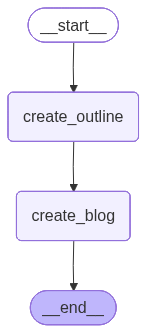

In [14]:
from IPython.display import Image 
Image(workflow.get_graph().draw_mermaid_png())